<h1 align="center"> Group 1 Project</h1>

## Phase 2
 - Tim, Timi, Chris

---
We have been contracted by a building company newly located in King County, WA. They want to enter the housing market and are unsure of which features of a new house are most important when looking to sell.

---

## Prerequisites

In [1]:
# we start by importing the Python libraries that we will be using:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
import seaborn as sns
plt.rcParams["figure.figsize"] = (13, 10)

In [2]:
df = pd.read_csv('../data/kc_house_data.csv') # load database

df.head() # show first 5 entries

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info() # get a summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

<h1 align="center">Cleaning the Data</h1> 

### Dealing with Null Values

In [4]:
df.isna().sum() # Looking at the number of total null values in our dataframe

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

---
We can see 3 total columns with null values, 2 of which have significantly more than the third. The large number of null values suggest that we should to see if we can fill them in with meaningful data.

---

In [5]:
# looking at the first column with null values
df['waterfront'].value_counts() # see how many houses total are waterfronts

NO     19075
YES      146
Name: waterfront, dtype: int64

---
Judging by the overwhelming amount of non-waterfront houses, it is probably safe to assume a NaN can be filled in by NO.

---

In [6]:
df['waterfront'] = df['waterfront'].fillna(value='NO') # replace all instances of a null value with NO

df.info() # check to see waterfront has no null values remaining

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

---
Next let's take a look at the view category

---


In [7]:
df.view.describe() # take a look at the view column

count     21534
unique        5
top        NONE
freq      19422
Name: view, dtype: object

---
Most of the entries are NONE, and since such a small amount of them are missing it is probably safe to assign the Null values to NONE in this case

---

In [8]:
df['view'] = df['view'].fillna(value='NONE') # replace all instances of a null value with NONE

df.info() # check to see view has no null values remaining

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

---
Finally we need to look at the yr_renovated column

---

In [9]:
df['yr_renovated'].value_counts() # take a look at the year renovated column

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

---
Again, an overwhelming amount of our entries belong to one group, in this case 0.0 indicates a house not being renovated. It is probably safe to assume the remaining values would also be for houses unrenovated considering they are noted when they do recieve the renovations.

---

In [10]:
df['yr_renovated'] = df['yr_renovated'].fillna(value=0.0) # replace all instances of a null value with 0.0
df.info() # check to see yr_renovated has no null values remaining

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Converting relevant objects into more useful types

---
Important possible categories for our stakeholder, including sqft_basement, are objects, but we need to see if we can get them to a more useful format to use in our regression.

---

In [11]:
df['sqft_basement'].unique() # with this we can see all unique entries in this particular column,
                             # maybe a string got entered by accident or something similar

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

---
There appears to be instances of a question mark which we should remove

---

In [12]:
df = df[df['sqft_basement'] != '?'] # drop all of the rows that have '?' as their value

In [13]:
df['sqft_basement'] = df['sqft_basement'].astype("float") # convert the remaining values as floats from strings

In [14]:
df.info() # confirm our conversion worked

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     21143 non-null  object 
 9   view           21143 non-null  object 
 10  condition      21143 non-null  object 
 11  grade          21143 non-null  object 
 12  sqft_above     21143 non-null  int64  
 13  sqft_basement  21143 non-null  float64
 14  yr_built       21143 non-null  int64  
 15  yr_renovated   21143 non-null  float64
 16  zipcode        21143 non-null  int64  
 17  lat            21143 non-null  float64
 18  long  

---
Date also appears to be an object, let's try to see about that

---

In [15]:
df['date'] # see the formatting of our dates

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21143, dtype: object

In [16]:
# we can split the dates up by year, that should be enough for our stakeholder
df['date'] = [x[-4:] for x in df['date']]

df['date'] = df['date'].astype("float")

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  float64
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     21143 non-null  object 
 9   view           21143 non-null  object 
 10  condition      21143 non-null  object 
 11  grade          21143 non-null  object 
 12  sqft_above     21143 non-null  int64  
 13  sqft_basement  21143 non-null  float64
 14  yr_built       21143 non-null  int64  
 15  yr_renovated   21143 non-null  float64
 16  zipcode        21143 non-null  int64  
 17  lat            21143 non-null  float64
 18  long  

---
Grade is also useful to look at for our stakeholder

---

In [17]:
df['grade'].unique() # inspect the grade column to see what can be done

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

---
It looks like we have a numerical rating from 3 to 13, we can easily strip the first two characters, then get rid of extra spaces and convert to a float

---

In [18]:
df['grade'] = [x[:2] for x in df['grade']] # list comprehension to take out the first two characters for our grades
df['grade'] = df['grade'].str.strip() # get rid of all the extra white spaces
df['grade'] = df['grade'].astype("float") # cast the new grades as floats to be used with our model

---
Next, we will look at waterfront, since it will be an important decision to make on location to build

---

In [19]:
df.waterfront.value_counts()

NO     21001
YES      142
Name: waterfront, dtype: int64

---
Since there are only 2 categories, yes and no, it is safe to replace no with 0 and yes with 1.

---

In [20]:
df['waterfront'] = df['waterfront'].replace(to_replace=['NO', 'YES'], value=[0,1]) # replace NO with 0 and YES with 1
df['waterfront'].value_counts()

0    21001
1      142
Name: waterfront, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  float64
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     21143 non-null  int64  
 9   view           21143 non-null  object 
 10  condition      21143 non-null  object 
 11  grade          21143 non-null  float64
 12  sqft_above     21143 non-null  int64  
 13  sqft_basement  21143 non-null  float64
 14  yr_built       21143 non-null  int64  
 15  yr_renovated   21143 non-null  float64
 16  zipcode        21143 non-null  int64  
 17  lat            21143 non-null  float64
 18  long  

---
The ID column has no real impact on our decions, and thus we can drop it completely.

---

In [22]:
df = df.drop(['id'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21143 non-null  float64
 1   price          21143 non-null  float64
 2   bedrooms       21143 non-null  int64  
 3   bathrooms      21143 non-null  float64
 4   sqft_living    21143 non-null  int64  
 5   sqft_lot       21143 non-null  int64  
 6   floors         21143 non-null  float64
 7   waterfront     21143 non-null  int64  
 8   view           21143 non-null  object 
 9   condition      21143 non-null  object 
 10  grade          21143 non-null  float64
 11  sqft_above     21143 non-null  int64  
 12  sqft_basement  21143 non-null  float64
 13  yr_built       21143 non-null  int64  
 14  yr_renovated   21143 non-null  float64
 15  zipcode        21143 non-null  int64  
 16  lat            21143 non-null  float64
 17  long           21143 non-null  float64
 18  sqft_l

---
#### SUCCESS! Now we have a clean dataset to work with

---

<h1 align="center">Modeling and Regression</h>

### Detecting Multicollinearity

''

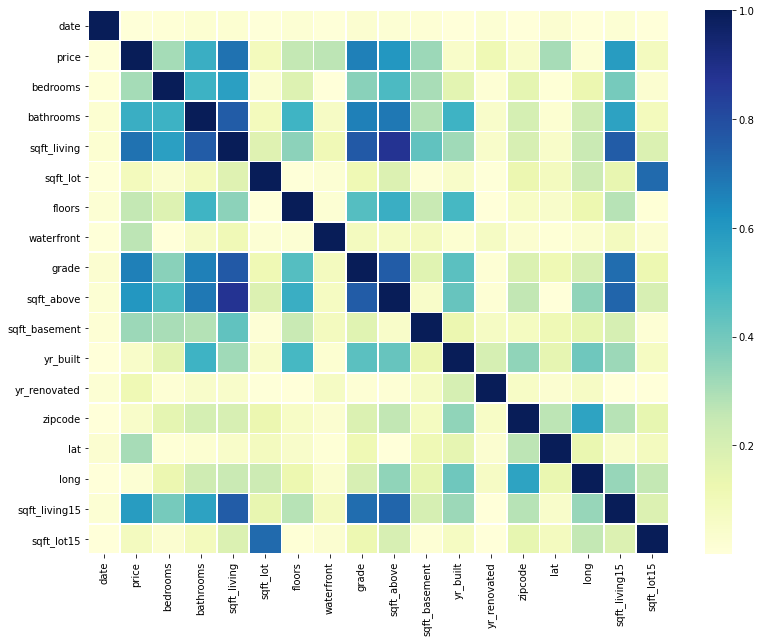

In [23]:
sns.heatmap(df.corr().abs(), cmap="YlGnBu", linewidths=.5) # run a heatmap to detect possible collinearity
;

---
There are some areas of interest and possible multicollinearity in several of our columns, indicated by the darker regions on the above heatmap

---

In [24]:
df.describe() # scan our new data for outliers

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21143.000000,2.114300e+04,21143.000000,21143.000000,21143.000000,2.114300e+04,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.00000,21143.000000
mean,2014.323417,5.405107e+05,3.372558,2.116079,2080.920730,1.508714e+04,1.493591,0.006716,7.658279,1789.069006,291.851724,1971.023223,68.256492,98077.868893,47.560274,-122.213876,1987.27139,12738.941967
std,0.467791,3.680751e+05,0.924917,0.768531,918.547562,4.120920e+04,0.539249,0.081679,1.174253,828.409769,442.498337,29.321938,362.765827,53.535756,0.138591,0.140597,685.67034,27169.273663
min,2014.000000,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.00000,651.000000
25%,2014.000000,3.220000e+05,3.000000,1.750000,1430.000000,5.043000e+03,1.000000,0.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471250,-122.328000,1490.00000,5100.000000
50%,2014.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572000,-122.230000,1840.00000,7626.000000
75%,2015.000000,6.450000e+05,4.000000,2.500000,2550.000000,1.069550e+04,2.000000,0.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.00000,10087.000000
max,2015.000000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.00000,871200.000000


In [25]:
# one of our houses appears to have 33 bedrooms, let's look into that
df['bedrooms'].sort_values(ascending = False).head()

15856    33
8748     11
15147    10
19239    10
13301    10
Name: bedrooms, dtype: int64

In [26]:
df.loc[[15856]] # inspect our first outlier

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2014.0,640000.0,33,1.75,1620,6000,1.0,0,NONE,Very Good,7.0,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


---
The amount of bedrooms appears to betray the square footing

---

In [27]:
df.loc[[8748]] # check the second outlier

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8748,2014.0,520000.0,11,3.0,3000,4960,2.0,0,NONE,Average,7.0,2400,600.0,1918,1999.0,98106,47.556,-122.363,1420,4960


In [28]:
# it would seem safe to drop our highest outliers in this case
df = df[df.bedrooms <= 10] # drop both the outlier rows

### Mean Normalization

---
In order to model our data we need to remove some columns, as they provide no useful mathematical correlation

---

In [29]:
df2 = df.drop(columns=["view", "condition", "date"])
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,7.0,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,7.0,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,6.0,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,7.0,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,8.0,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # initialize scaler
df_scale = pd.DataFrame(scaler.fit_transform(df2), columns = df2.columns)  # fit and transform our data as well as making sure our
                                                                        # columns keep their original names
df_scale.head() # check out our new dataframe

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,-0.865584,-0.411682,-1.452211,-0.980792,-0.229023,-0.915345,-0.082233,-0.560642,-0.735241,-0.659489,-0.546621,-0.188035,1.870384,-0.354051,-0.306814,-0.944096,-0.260940
1,-0.006811,-0.411682,0.174291,0.532475,-0.190391,0.939116,-0.082233,-0.560642,0.459830,0.244467,-0.683047,5.303910,0.880403,1.159746,-0.747799,-0.433639,-0.187734
2,-0.979417,-1.521946,-1.452211,-1.427152,-0.123466,-0.915345,-0.082233,-1.412240,-1.230169,-0.659489,-1.296964,-0.188035,-0.931448,1.281686,-0.136110,1.068562,-0.172165
3,0.172496,0.698583,1.150191,-0.131621,-0.244796,-0.915345,-0.082233,-0.560642,-0.892169,1.397011,-0.205556,-0.188035,1.085871,-0.284783,-1.274136,-0.914927,-0.284864
4,-0.082881,-0.411682,-0.151010,-0.436451,-0.170057,-0.915345,-0.082233,0.290956,-0.131670,-0.659489,0.544788,-0.188035,-0.072220,0.407898,1.201071,-0.273210,-0.192739


In [31]:
df_scale.describe() # get quick summary stats for our data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.114100e+04,2.114100e+04,2.114100e+04,2.114100e+04,2.114100e+04,2.114100e+04,2.114100e+04,2.114100e+04,2.114100e+04,2.114100e+04,2.114100e+04,2.114100e+04,2.114100e+04,2.114100e+04,2.114100e+04,2.114100e+04,2.114100e+04
mean,-8.066329e-17,-6.856379e-17,-5.377553e-17,-2.688776e-17,6.721941e-18,-4.302042e-17,6.721941e-18,-2.688776e-16,-2.688776e-17,-4.839797e-17,2.839348e-15,2.016582e-17,1.122598e-13,2.071803e-14,7.020395e-15,-8.604084e-17,2.688776e-18
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.256529e+00,-2.632211e+00,-2.102811e+00,-1.862625e+00,-3.535070e-01,-9.153446e-01,-8.223276e-02,-3.967033e+00,-1.713026e+00,-6.594892e-01,-2.422480e+00,-1.880347e-01,-1.435778e+00,-2.917692e+00,-2.170332e+00,-2.316495e+00,-4.449310e-01
25%,-5.936349e-01,-4.116818e-01,-4.763100e-01,-7.086219e-01,-2.437522e-01,-9.153446e-01,-8.223276e-02,-5.606423e-01,-7.110981e-01,-6.594892e-01,-6.489404e-01,-1.880347e-01,-8.380537e-01,-6.426681e-01,-8.118131e-01,-7.253288e-01,-2.811831e-01
50%,-2.458874e-01,-4.116818e-01,1.742905e-01,-1.860547e-01,-1.812190e-01,1.188588e-02,-8.223276e-02,-5.606423e-01,-2.765268e-01,-6.594892e-01,1.355098e-01,-1.880347e-01,-2.403295e-01,8.464696e-02,-1.147719e-01,-2.148721e-01,-1.882122e-01
75%,2.838843e-01,6.985829e-01,4.995908e-01,5.107016e-01,-1.065770e-01,9.391163e-01,-8.223276e-02,2.909555e-01,5.081158e-01,6.060495e-01,8.858534e-01,-1.880347e-01,7.309724e-01,8.509254e-01,6.320579e-01,5.435207e-01,-9.763375e-02
max,1.945075e+01,7.360171e+00,7.656196e+00,1.247531e+01,3.970561e+01,3.720808e+00,1.216060e+01,4.548945e+00,9.199541e+00,1.023318e+01,1.499771e+00,5.370111e+00,2.262641e+00,1.568139e+00,6.393317e+00,6.158544e+00,3.159611e+01


''

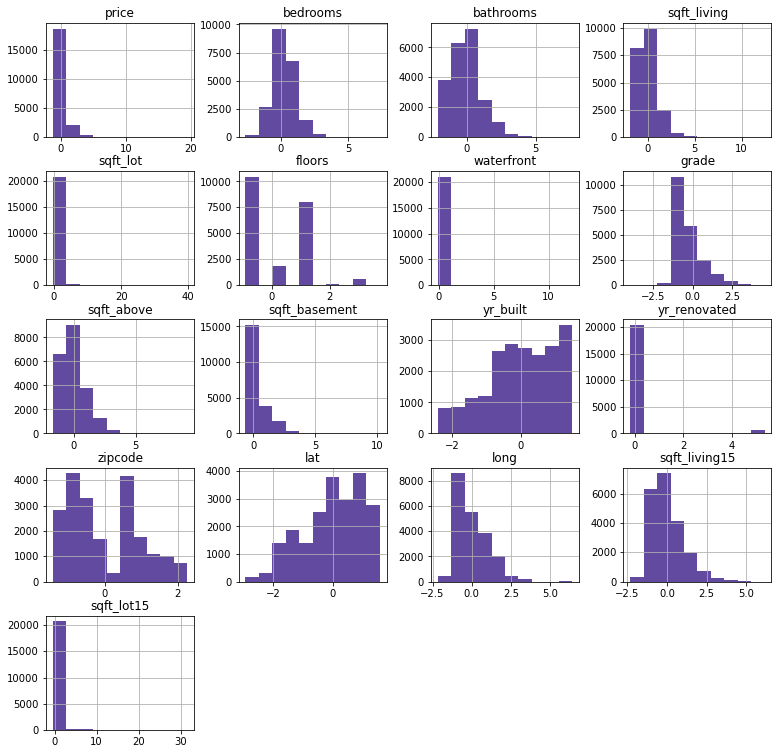

In [32]:
df_scale.hist(figsize= (13,13), color='#624aa1')
;

---
It would appear most of our data isn't normally distributed, except for bedrooms. It is significant to also point out they are all positively skewed.

---

### Log Transformation

In [33]:
df_log = df2.copy() # create a duplicate dataframe to work with

df_log.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,7.0,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,7.0,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,6.0,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,7.0,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,8.0,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [34]:
df_log['price'] = np.log(df_log['price']) # perform our transformation onto price

In [35]:
def z(x): # define function to to mean normalizations for us
    return (x - x.mean() / x.std())

In [36]:
df_log['bedrooms'] = z(df_log['bedrooms'])
df_log['bathrooms'] = z(df_log['bathrooms'])
df_log['sqft_living'] = z(df_log['sqft_living'])
df_log['sqft_lot'] = z(df_log['sqft_lot'])
df_log['floors'] = z(df_log['floors'])
df_log['waterfront'] = z(df_log['waterfront'])
df_log['grade'] = z(df_log['grade'])
df_log['sqft_above'] = z(df_log['sqft_above'])
df_log['sqft_basement'] = z(df_log['sqft_basement'])
df_log['yr_built'] = z(df_log['yr_built'])
df_log['yr_renovated'] = z(df_log['yr_renovated'])
df_log['zipcode'] = z(df_log['zipcode'])
df_log['lat'] = z(df_log['lat'])
df_log['long'] = z(df_log['long'])
df_log['sqft_living15'] = z(df_log['sqft_living15'])
df_log['sqft_lot15'] = z(df_log['sqft_lot15'])

In [37]:
df_log.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,12.309982,-0.742387,-1.753347,1177.734617,5649.633883,-1.76974,-0.082231,0.478327,1177.840382,-0.659474,1887.776702,-0.18803,96346.058408,-295.648357,746.988769,1337.101653,5649.53112
1,13.195614,-0.742387,-0.503347,2567.734617,7241.633883,-0.76974,-0.082231,0.478327,2167.840382,399.340526,1883.776702,1990.81197,96293.058408,-295.438557,746.926769,1687.101653,7638.53112
2,12.100712,-1.742387,-1.753347,767.734617,9999.633883,-1.76974,-0.082231,-0.521673,767.840382,-0.659474,1865.776702,-0.18803,96196.058408,-295.421657,747.012769,2717.101653,8061.53112
3,13.311329,0.257613,0.246653,1957.734617,4999.633883,-1.76974,-0.082231,0.478327,1047.840382,909.340526,1897.776702,-0.18803,96304.058408,-295.638757,746.852769,1357.101653,4999.53112
4,13.142166,-0.742387,-0.753347,1677.734617,8079.633883,-1.76974,-0.082231,1.478327,1677.840382,-0.659474,1919.776702,-0.18803,96242.058408,-295.542757,747.200769,1797.101653,7502.53112


<AxesSubplot:>

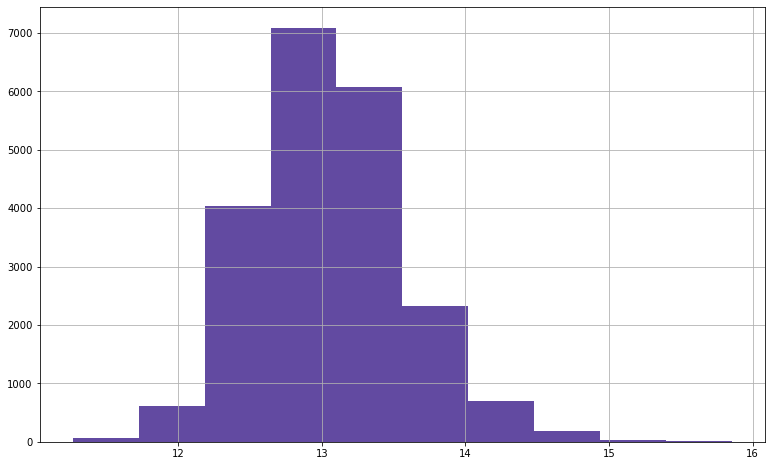

In [38]:
df_log['price'].hist(figsize= (13,8), color='#624aa1')

---
Look at how normal and nice it looks! Let's use this from now on.

---

### More Plotting

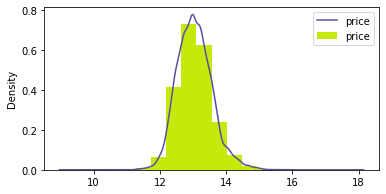

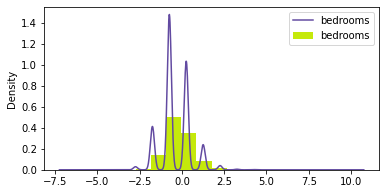

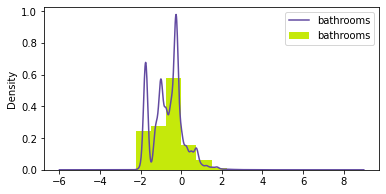

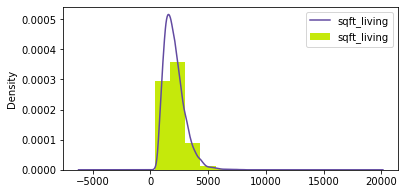

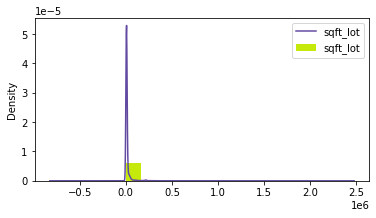

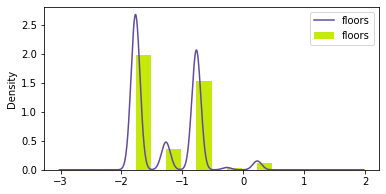

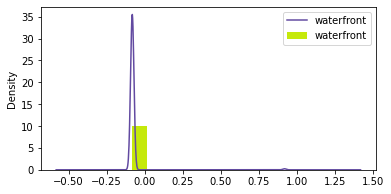

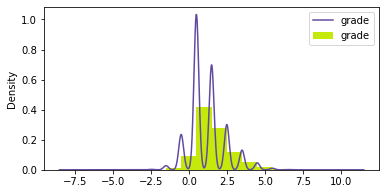

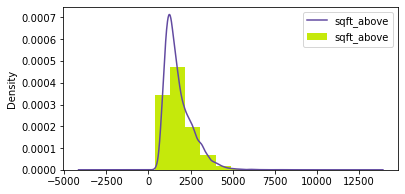

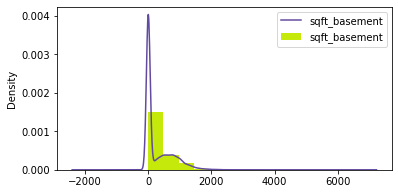

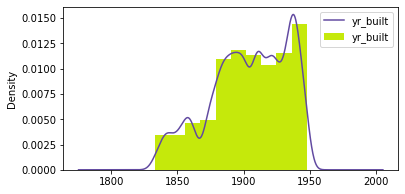

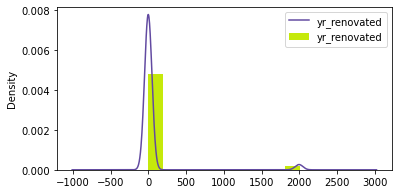

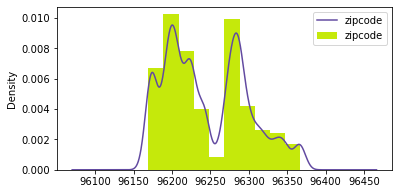

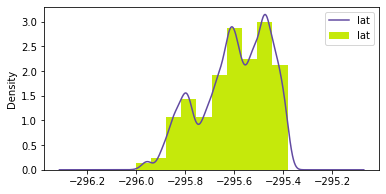

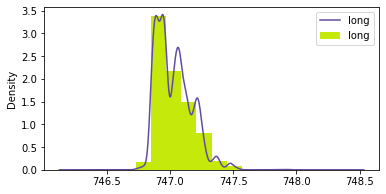

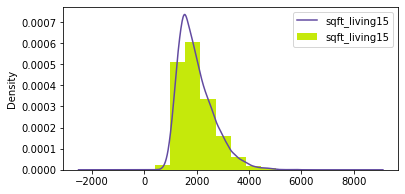

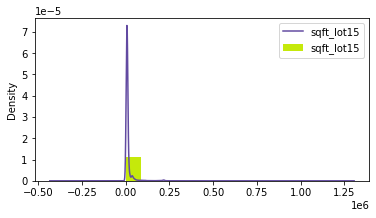

''

In [46]:
new = list(df_log) # creating a list of columns from our scaled data

for column in new: # for loop to iterate through our list for plotting
    df_log[column].plot.hist(density=True, figsize= (6,3), color='#c5e90b') # make histogram
    df_log[column].plot.kde(label=column, color='#624aa1') # make KDE plot
    plt.legend() # show legend for each plot
    plt.show()
;

---
The KDE Plot makes it a lot easier to see how our data is distributed. With this type of plot we can see that our data is slightly more normalized that previously, especially bedrooms.

---

### Modeling and Regression

In [40]:
column_names = df_log.describe().columns

results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value']]

for idx, value in enumerate(column_names):
    print("price~" + value) # labeling our results with their respective values
    f = 'price~' + value # initialize our formula
    model = smf.ols(formula=f, data=df_log).fit() # fitting our line
    X_new = pd.DataFrame({value: [df_log[value].min(), df_log[value].max()]}) # make a DF with min and max values of our date
    preds = model.predict(X_new) # create and store our prediction
    results.append([value, model.rsquared, model.params[0], model.params[1], model.pvalues[1]]) # add each values data to our results
    print(results[idx+1]) # view our results
    print(model.summary()) # shows the regression diagnostics summary
    print(preds) # shows our prediction data

price~price
['price', 1.0, 5.2735593669694936e-15, 0.9999999999999984, 0.0]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.613e+31
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:42:39   Log-Likelihood:             6.4296e+05
No. Observations:               21141   AIC:                        -1.286e+06
Df Residuals:                   21139   BIC:                        -1.286e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

['zipcode', 0.00146403940530071, 49.276150050876666, -0.0003764080799429057, 2.6201083276942588e-08]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     30.99
Date:                Wed, 16 Feb 2022   Prob (F-statistic):           2.62e-08
Time:                        14:42:39   Log-Likelihood:                -16427.
No. Observations:               21141   AIC:                         3.286e+04
Df Residuals:                   21139   BIC:                         3.287e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [41]:
pd.DataFrame(results) # a nice table holding our results

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,price,1,5.27356e-15,1,0
2,bedrooms,0.123409,13.1247,0.205415,0
3,bathrooms,0.303736,13.2891,0.37768,0
4,sqft_living,0.483657,12.2195,0.000398751,0
5,sqft_lot,0.00979682,13.0293,1.26494e-06,3.54787e-47
6,floors,0.0961882,13.435,0.302908,0
7,waterfront,0.0291246,13.1315,1.10038,6.78043e-138
8,grade,0.494977,12.6897,0.315543,0
9,sqft_above,0.361802,12.3651,0.000382407,0


---

We have pretty low R^2 data here, which indicates the percentage of the variance in our target variable (price).

Our P-values are all low (below 0.05) which is appreciated because it shows our results are significant.

---

In [42]:
column_names2 = df_log.drop(['price'], axis=1)

f2 = 'price~' + ' + '.join(column_names2)  # defining our formula
mod = smf.ols(formula=f2, data=df_log) # run an OLS regression on our model overall
mod.fit().summary() # fit and summarize data

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     4449.
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:42:40   Log-Likelihood:                -1376.5
No. Observations:               21141   AIC:                             2785.
Df Residuals:                   21125   BIC:                             2912.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       557.8031     14.470     38.550      0.000     529.441     586.165
bedrooms         -0.0175      0.003     -6.813      0.000      -0.023      -0.012
bathrooms         0.0775      0.004     18.303      0.000       0.069       0.086
sqft_living     102.9535      2.671     38.550      0.000      97.719     108.188
sqft_lot       4.958e-07   6.27e-08      7.911      0.000    3.73e-07    6.19e-07
floors            0.0722      0.005     15.462      0.000       0.063       0.081
waterfront        0.5643      0.022     25.555      0.000       0.521       0.608
grade             0.1657      0.003     59.343      0.000       0.160       0.171
sqft_above     -102.9534      2.671    -38.550      0.000    -108.188     -97.719
sqft_basement  -102.9533      2.671    -38.550      0.000    -108.188     -97.719
yr_built         -0.0043   8.83e-05    -48.180      0.000      -0.004      -0.004
yr_renovated   2.714e-05   5.11e-06      5.309      0.000    1.71e-05    3.72e-05
zipcode          -0.0007   4.24e-05    -15.664      0.000      -0.001      -0.001
lat               1.3523      0.014     97.658      0.000       1.325       1.379
long             -0.1748      0.017    -10.248      0.000      -0.208      -0.141
sqft_living15     0.0001   4.41e-06     25.113      0.000       0.000       0.000
sqft_lot15    -2.367e-07   9.58e-08     -2.469      0.014   -4.25e-07   -4.88e-08
==============================================================================
Omnibus:                      370.383   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              746.068
Skew:                          -0.050   Prob(JB):                    9.85e-163
Kurtosis:                       3.915   Cond. No.                     1.52e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.97e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""